In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')
from pandas import Series, DataFrame
import numpy.random as rnd
import scipy.stats as st

In [2]:
rnd.randn(10)

array([ 0.96862738,  0.12649908,  1.32325958, -0.11135376, -0.19579945,
       -0.04191762, -0.62456051, -0.26497746, -0.93434964,  0.11884018])

In [3]:
def plot_cdf(data, plot_range=None, scale_to=None, **kwargs): 
    num_bins = len(data)    
    sorted_data = np.array(sorted(data), dtype=np.float64) 
    data_range = sorted_data[-1] - sorted_data[0] 
    counts, bin_edges = np.histogram(sorted_data, bins=num_bins) 
    xvalues = bin_edges[1:] 
    yvalues = np.cumsum(counts) 
    if plot_range is None: 
        xmin = sorted_data[0] 
        xmax = sorted_data[-1] 
    else: 
        xmin, xmax = plot_range 
    #pad the arrays 
    xvalues = np.concatenate([[xmin, xvalues[0]], xvalues, [xmax]]) 
    yvalues = np.concatenate([[0.0, 0.0], yvalues, [yvalues.max()]]) 
    if scale_to is not None: 
        yvalues = yvalues / len(data) * scale_to 
    #print xvalues.shape, yvalues.shape
    return plt.plot(xvalues, yvalues, **kwargs) 

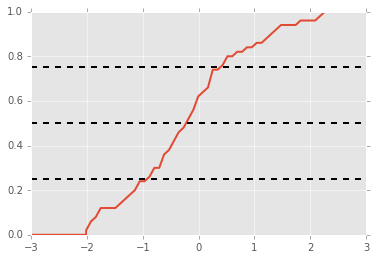

In [4]:
plot_cdf(rnd.randn(50), [-3, 3], 1.0, lw=2)
for v in [0.25, 0.5, 0.75]:
    plt.axhline(v, lw=2, ls='--', color='black')

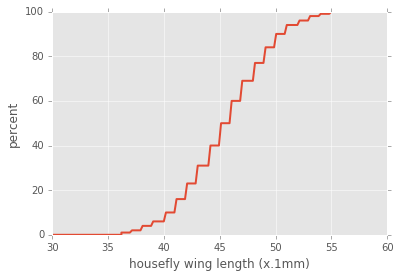

In [5]:
wingLens = np.fromfile('s057.txt', sep='\n', dtype=np.float64)
plot_cdf(wingLens, [30, 60], 100, lw=2)
plt.xlabel('housefly wing length (x.1mm)')
plt.ylabel('percent')

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

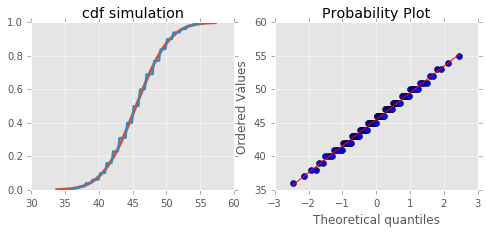

In [6]:
mean, std = st.norm.fit(wingLens)
rvNorm = st.norm(loc=mean, scale=std)
xx = np.linspace(mean-3*std, mean+3*std)
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(xx, rvNorm.cdf(xx), lw=3)
plot_cdf(wingLens, scale_to=1, lw=2)
plt.title('cdf simulation')
plt.subplot(1, 2, 2)
st.probplot(wingLens, dist='norm', plot=plt)

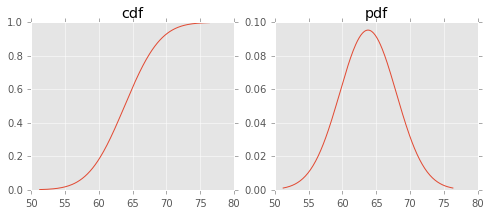

In [7]:
N = 4857
mean = 63.8
serr = 0.06
std = serr * np.sqrt(N)
rvNorm = st.norm(loc=mean, scale=std)
xmin, xmax = mean-3*std, mean+3*std
xx = np.linspace(xmin, xmax, 200)
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(xx, rvNorm.cdf(xx))
plt.title('cdf')
plt.subplot(1, 2, 2)
plt.plot(xx, rvNorm.pdf(xx))
plt.title('pdf')

In [8]:
categories = [
    ('petite', 59, 63),
    ('average', 63, 68),
    ('tall', 68, 71)
]
for cat, h1, h2 in categories:
    print '%8s: %.3f' % (cat, rvNorm.cdf(h2)-rvNorm.cdf(h1))

  petite: 0.299
 average: 0.418
    tall: 0.115


In [9]:
too_short = rvNorm.cdf(59)
too_tall = 1-rvNorm.cdf(71)
print too_short, too_tall
print rvNorm.ppf(0.25), rvNorm.ppf(0.75)
print rvNorm.stats(moments='mvks')  # mean, variance, skew, kurtosis

0.125503898661 0.0425476721471
60.9796003217 66.6203996783
(array(63.8), array(17.485200000000003), array(0.0), array(0.0))


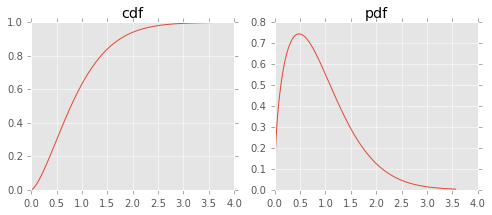

In [10]:
beta, eta = 1.5, 1.0
rvWb = st.weibull_min(beta, scale=eta)
wbrvs = rvWb.rvs(200)
xx = np.linspace(wbrvs.min(), wbrvs.max(), 200)
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(xx, rvWb.cdf(xx))
plt.title('cdf')
plt.subplot(1, 2, 2)
plt.plot(xx, rvWb.pdf(xx))
plt.title('pdf')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115d79e10>]], dtype=object)

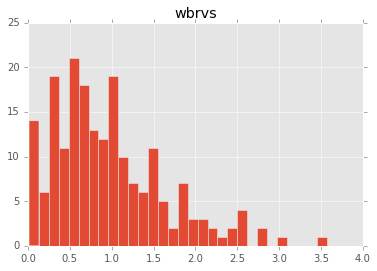

In [11]:
df = DataFrame(wbrvs, columns=['wbrvs'])
df.hist(bins=30)

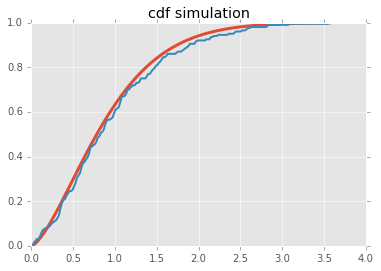

In [12]:
plt.plot(xx, rvWb.cdf(xx), lw=3)
plot_cdf(wbrvs, scale_to=1, lw=2)
plt.title('cdf simulation')